In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = pd.read_csv("../Hasil Scrap/data_hasil_scrap_negative.csv")
df.tail(2)

,url,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181
183,https://premierwomensobgyn.com/,rajazeus> slot gacor situs judi online slot88 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,https://www.gamblingsites.org/,blog about us contact real money gambling onli...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df = df[['url','text']]
df.tail(2)

,url,text
183,https://premierwomensobgyn.com/,rajazeus> slot gacor situs judi online slot88 ...
184,https://www.gamblingsites.org/,blog about us contact real money gambling onli...


In [3]:
# Mencari nilai NaN di kolom 'tweet' menggunakan isna() dan menghitung jumlahnya
nan_count = df['text'].isna().sum()

# Menghitung jumlah data kosong di kolom "text"
jumlah_data_kosong = df['text'].str.strip().eq('').sum()

# Menampilkan jumlah nilai NaN
print("Jumlah nilai NaN di kolom 'text':", nan_count)
print("Jumlah nilai '' di kolom 'text':", jumlah_data_kosong)

Jumlah nilai NaN di kolom 'text': 0
Jumlah nilai '' di kolom 'text': 0


<h4><b>Word Cloud Awal

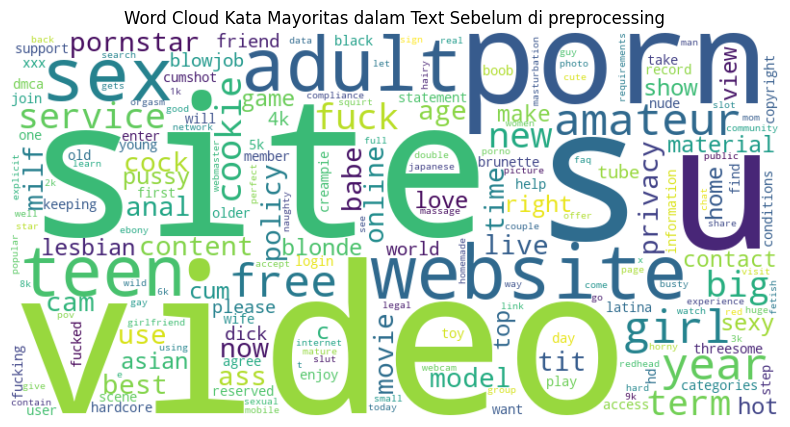

In [4]:
tes = df['text'].to_list()
# Menggabungkan semua kata dalam kolom tweet
all_words = ' '.join(tes)

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, collocations=False, background_color='white').generate(all_words)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Kata Mayoritas dalam Text Sebelum di preprocessing')
plt.show()

In [5]:
df['text'][0]


"spicevids uviu sexual wellness insights sites shop trust & safety en home porn videos categories live cams pornstars neuken community photos gifs you are now viewing pornhub in english. overschakelen naar dutch. pornhub’s core collection merch is a staple any wardrobe! buy yours now! hot netherlands oktoberfest mdemma wrestling brianna beach lesbian orgasm nude plumber fart italian macy meadows 11:56 programmers wife 708k 87% mutual masturbation with neighbour until cumshot while watching, - 8:37 cream for me baby 8.6m 91% bust huge nut on her perfect ass and kept going! (cumshot) 7:27 brjose93 40k 69% wet woman riding my cock without condom 40:59 free sis loves 896k 90% fan's favorite top viewed step full movie w/ jessie saint elena koshka 6:04 elly clutch 93% cute redhead roomate suprises sloppy blowjob 9:10 alex adams 2.3m 89% i went to the mom comes first 14:50 booty frutti 960k just don't cum inside like last time! 20:36 de amateurtwo 6.2m sharing hotel room stepsister 17:10 real

<h4><b>Fix Contraction

In [6]:
with open('../Prepo/kbba.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

data = [line.strip().split('\t') for line in lines]
data_singkatan = pd.DataFrame(data, columns=['Contraction', 'Meaning'])

df_en = pd.read_csv("../Prepo/contractions.csv")

# Menggabungkan DataFrames secara vertikal (menambahkan baris)
df_singkatan = pd.concat([data_singkatan, df_en], ignore_index=True)

# Ubah DataFrame menjadi kamus
kontraksi_dict = dict(zip(df_singkatan['Contraction'], data_singkatan['Meaning']))

<h4><b>Prepo

In [7]:
df_awal = df

In [8]:
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.StopWordRemover.StopWordRemover import StopWordRemover
from deep_translator import GoogleTranslator

try:
    from nltk.corpus import stopwords
except LookupError:
    # Download stopwords (jika belum diunduh)
    nltk.download('stopwords')
    
try:
    from nltk.stem import PorterStemmer
except LookupError:
    # Download punkt (jika belum diunduh)
    nltk.download('punkt')

# Fungsi untuk menghapus kata-kata dengan satu huruf
def remove_tag(text):
    words = text.split()
    filtered_words = [word for word in words if not word.startswith('#')]  # Menghapus kata-kata yang dimulai dengan '#'
    filtered_words = [word for word in filtered_words if not word.startswith('http')]  # Menghapus kata-kata yang dimulai dengan '#'
    filtered_words = [word for word in filtered_words if not word.startswith('https')]  # Menghapus kata-kata yang dimulai dengan '#'
    return ' '.join(filtered_words)

# Fungsi untuk menghapus tanda baca
def remove_punctuation(text):
    hasil = re.sub(r'[^\w\s]', '', text)
    return hasil

# Fungsi untuk mengatasi kontraksi dalam bahasa Indonesia
def expand_contractions_id(text):
    kontraksi_dict
    
    words = text.split()
    expanded_text = [kontraksi_dict[word] if word in kontraksi_dict else word for word in words]
    return ' '.join(expanded_text)

def ubah_angka(text):
    # Menggunakan regular expression untuk mengganti karakter alay
    teks_benar = re.sub(r'3', 'e', text)
    teks_benar = re.sub(r'4', 'a', teks_benar)
    teks_benar = re.sub(r'1', 'i', teks_benar)
    teks_benar = re.sub(r'0', 'o', teks_benar)
    return teks_benar

def remove_number(text) :
    hasil = re.sub(r'\d', '', text)
    return hasil

# Fungsi untuk menghapus tautan dari teks
def remove_links(text):
    # Menggunakan ekspresi reguler untuk mencari dan menghapus tautan
    return re.sub(r'http\S+|www\S+|https\S+', '', text)

# Fungsi untuk menghapus kata-kata dengan satu huruf
def remove_single_letter_words(text):
    text = re.sub(r'\b\w\b', '', text)
    
    hapus = ['rj','lc','en','ar','mc','vt','rob','ny','dc','az','va']
    words = text.split()

    # Memfilter kata-kata yang tidak ada dalam array yang akan dihapus
    kata_kata_tanpa_kata_yang_dihapus = [kata for kata in words if kata not in hapus]

    # Menggabungkan kata-kata yang tersisa menjadi kalimat baru
    kalimat_tanpa_kata_yang_dihapus = ' '.join(kata_kata_tanpa_kata_yang_dihapus)
    return kalimat_tanpa_kata_yang_dihapus

def translate(text) :
    # to_translate = 'I want to translate this text'
    translated = GoogleTranslator(source='auto', target='en').translate(text)
    return translated

def stem(text) :
    # Membuat objek stemmer
    stemmer = PorterStemmer()

    # Melakukan stemming pada kolom 'text'
    hasil = ' '.join([stemmer.stem(word) for word in text.split()])
    return hasil

def lem(text) :
    import spacy

    # Memuat model bahasa Inggris
    nlp = spacy.load("en_core_web_sm")
    
    hasil = ' '.join([token.lemma_ for token in nlp(text)])
    return hasil

# Preprocessing kolom 'text'
df['text'] = df['text'].apply(remove_tag)
df['text'] = df['text'].apply(remove_punctuation)
df['text'] = df['text'].apply(expand_contractions_id)
df['text'] = df['text'].apply(ubah_angka)
df['text'] = df['text'].apply(remove_number)
df['text'] = df['text'].apply(remove_links)
df['text'] = df['text'].apply(remove_single_letter_words)
df['text'] = df['text'].str.slice(0, 1000)
df['text'] = df['text'].apply(translate)
df['text'] = df['text'].apply(stem)
df['text'] = df['text'].apply(lem)

# Ambil daftar stopwords dalam bahasa Inggris
stop_words_english = set(stopwords.words('english'))
stop_words_indonesian = set(stopwords.words('indonesian'))


# Inisialisasi stopword remover dari Sastrawi
factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()

stop_words = []
stop_words_english = list(stop_words_english)
stop_words_indonesian = list(stop_words_indonesian)
# Buka file teks
with open('tambahan.txt', 'r') as file:
    # Baca setiap baris dalam file dan hapus karakter newline (newline)
    tambahan = [line.strip() for line in file]
    
stop_words.extend(stop_words_english)
stop_words.extend(stop_words_indonesian)
stop_words.extend(tambahan)

# Menghapus stopwords dari kolom 'text'
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Menampilkan DataFrame setelah preprocessing
df.head(2)

,url,text
0,https://pornhub.com,spicevid uviu sexual well insight shop trust s...
1,https://xvideos.com,welcom xvideoscom plea select prefer version u...


In [9]:
df['text'][172]

"cool zeu slot maxwin rtp welcom zeusqq today often easi win king god qq easi jp game good trust onlin gambl agent iaiaia zeus_qq zeus_qq provid nexu engin game gate olympu sweet bonanza sugar rush starlight princess bca mandiri transact cimb niaga danamon bni bri puls emoney deposit idr veri small continu withdraw max win big epic pay link zeusqq provid free creation present full hour everi differ nuanc servic give sensat play machin ' easy , cellphone , fun becom practical . member cours receiv variou benefit , attract bonu promotion , reliabl custom service , least afford enough , complet transact medium , ewallet credit , indonesia , type big provid asia even world , guarante veri good opportunity ."

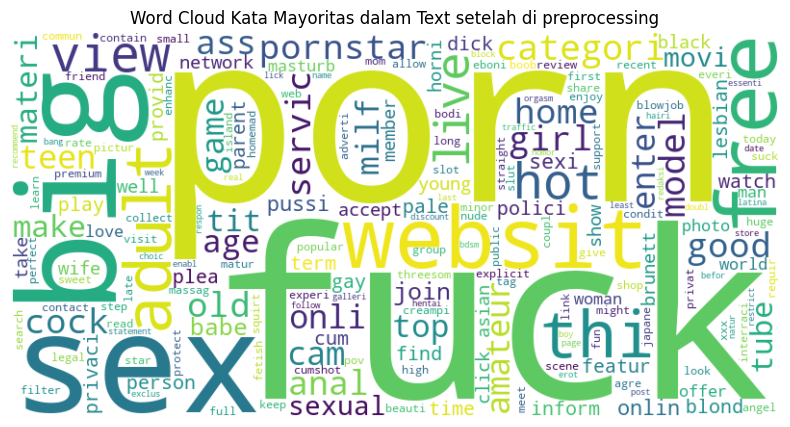

In [10]:
tes = df['text'].to_list()
# Menggabungkan semua kata dalam kolom tweet
all_words = ' '.join(tes)

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, collocations=False, background_color='white').generate(all_words)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Kata Mayoritas dalam Text setelah di preprocessing')
plt.show()

In [11]:
# Buka file teks
with open('tambahan.txt', 'r') as file:
    # Baca setiap baris dalam file dan hapus karakter newline (newline)
    tambahan = [line.strip() for line in file]

# Menghapus stopwords dari kolom 'text'
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in tambahan]))

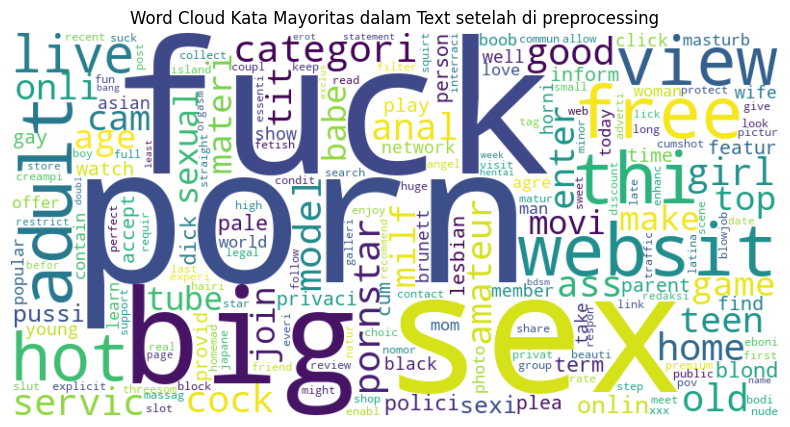

In [12]:
tes = df['text'].to_list()
# Menggabungkan semua kata dalam kolom tweet
all_words = ' '.join(tes)

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, collocations=False, background_color='white').generate(all_words)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Kata Mayoritas dalam Text setelah di preprocessing')
plt.show()

In [13]:
df.shape

(185, 2)

In [14]:
df['text'][178]

"manhwa land bookmark porn dude contact color follow peopl statu ongo type relea author seriou post komindo februari septemb view sex stopwatch adult drama harem synopsi hey loser joo secretli look chest panti right befor regular student repeat joo ohyoung lose get hit popular girl sexi bodi awaken king ' abil stop time dare hit thi punish touch thi facebook twitter app pinterest warn seri titl sex stopwatch may contain violenc blood sexual appropri minor chapter first august juli june may april march comment secret class board diari stepmoth friend listsearch order alphabet name ya comic thi websit onli preview origin comic mani languag error charact name stori li"